## Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-processing

In [2]:
#import data
df = pd.read_csv('dataset/study case.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [3]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [4]:
df['agent'] = df['agent'].fillna('No Agent')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,No Agent,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [5]:
#konversi tipe data yang belum sesuai 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [6]:
#drop kolom yang tidak diperlukan 
df = df.drop(columns=['company'])

In [7]:
#cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [8]:
#cek missing value
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            3
babies                              0
meal                                0
country                           346
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [9]:
#drop missing value
df = df.dropna()

In [10]:
#memisahkan data kategorikal dan numerik
nums = df.select_dtypes(include=['number']).columns.tolist()
cats = df.select_dtypes(exclude=['number']).columns.tolist()
df[nums].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
0,0,8,2019,2,10,0,4,2,0.0,0,0,0,0,0,0,38.40,0,0,1
1,1,524,2018,51,15,0,2,2,0.0,0,0,0,0,0,0,62.80,0,0,2
2,1,175,2019,20,19,1,2,2,0.0,0,0,0,0,0,0,110.00,0,0,3
4,1,33,2017,39,26,2,3,2,0.0,0,0,0,0,0,0,57.92,0,1,5
5,1,395,2018,13,21,1,2,2,0.0,0,0,1,0,0,0,62.80,0,0,6


In [11]:
df[cats].head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,reservation_status_date
0,"Crystal Cove, Barbados Barbados",January,BB,ITA,Online TA,TA/TO,A,A,No Deposit,314.0,Transient,Check-Out,2019-01-14
1,"Greensboro Courtyard Greensboro, NC",December,BB,PRT,Groups,TA/TO,A,A,Non Refund,1.0,Transient,Canceled,2017-10-21
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",May,BB,PRT,Groups,TA/TO,A,A,Non Refund,12.0,Transient,Canceled,2018-11-25
4,"W New York – Union Square New York, NY",September,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,16.0,Transient,Canceled,2017-08-24
5,"Hotel Maria Cristina, San Sebastian San Sebast...",March,BB,PRT,Groups,TA/TO,A,A,Non Refund,1.0,Transient,Canceled,2017-08-10


In [12]:
df.describe().round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,bookingID
count,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944.0,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944.00,82944,82944.00
mean,0.37,104.21,2018.16,27.16,15.79,0.93,2.51,1.86,0.1,0.01,0.03,0.09,0.14,0.22,2.36,101.89,0.06,0.57,2018-07-31 01:34:26.666666752,41642.71
min,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017-01-01 00:00:00,1.00
25%,0.00,18.00,2018.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,70.00,0.00,0.00,2018-02-02 00:00:00,20820.75
50%,0.00,69.00,2018.00,27.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,95.00,0.00,0.00,2018-08-07 00:00:00,41635.50
75%,1.00,160.00,2019.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00,2019-02-08 00:00:00,62465.25
max,1.00,737.00,2019.00,53.00,31.00,16.00,40.00,55.00,10.0,10.00,1.00,26.00,70.00,21.00,391.00,508.00,8.00,5.00,2019-09-10 00:00:00,83293.00
std,0.48,106.92,0.71,13.61,8.78,1.00,1.91,0.61,0.4,0.10,0.17,0.86,1.54,0.66,17.86,48.02,0.24,0.79,NaN,24043.33


In [13]:
#mendeskripsikan data
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status
count,82944,82944,82944,82944,82944,82944,82944,82944,82944,82944.0,82944,82944
unique,64,12,5,165,7,5,10,11,3,320.0,4,3
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9.0,Transient,Check-Out
freq,1369,9625,64111,33949,39383,68259,59791,51570,72640,22303.0,62221,52218


In [14]:
#mencari outlier dengan metode IQR
Q1 = df[nums].quantile(0.25)
Q3 = df[nums].quantile(0.75)
IQR = Q3 -Q1

outliers = ((df[nums] < (Q1 - 1.5 * IQR)) | (df[nums] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

is_canceled                           0
lead_time                          2112
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             194
stays_in_week_nights               2348
adults                            20712
children                           5952
babies                              641
is_repeated_guest                  2517
previous_cancellations             4373
previous_bookings_not_canceled     2379
booking_changes                   12649
days_in_waiting_list               2594
adr                                2677
required_car_parking_spaces        5031
total_of_special_requests          2006
bookingID                             0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82944 non-null  object        
 1   is_canceled                     82944 non-null  int64         
 2   lead_time                       82944 non-null  int64         
 3   arrival_date_year               82944 non-null  int64         
 4   arrival_date_month              82944 non-null  object        
 5   arrival_date_week_number        82944 non-null  int64         
 6   arrival_date_day_of_month       82944 non-null  int64         
 7   stays_in_weekend_nights         82944 non-null  int64         
 8   stays_in_week_nights            82944 non-null  int64         
 9   adults                          82944 non-null  int64         
 10  children                        82944 non-null  float64       
 11  babies 

## Feature Engineering

1. Jumlah total pelanggan menginap 

In [16]:
df['total_nights'] = (
    df['stays_in_weekend_nights'] +
    df['stays_in_week_nights']
)

2. Total guest

In [17]:
df['total_guests'] = (
    df['adults'] +
    df['children'] +
    df['babies']
)

3. Tipe Booking pelanggan

In [18]:
df['booking_type'] = 'Couple'

df.loc[df['adults'] == 1, 'booking_type'] = 'Solo'
df.loc[df['children'] > 0, 'booking_type'] = 'Family'
df.loc[df['adults'] >= 4, 'booking_type'] = 'Group'

In [22]:
#memisahkan nama hotel, kota, dan negara
US_STATES = {
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS',
    'KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
    'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV',
    'WI','WY'
}

def clean_location(text):
    if pd.isna(text):
        return text
    words = text.split()
    result = [words[0]]
    for w in words[1:]:
        if w != result[-1]:
            result.append(w)
    return ' '.join(result)

def split_and_map(text):
    parts = text.split(', ')
    
    if len(parts) == 2:
        hotel_name = parts[0]
        city = np.nan
        country = clean_location(parts[1])
        
    elif len(parts) >= 3:
        hotel_name = ', '.join(parts[:-2])
        city = clean_location(parts[-2])
        country = clean_location(parts[-1])
        
    else:
        hotel_name = text
        city = np.nan
        country = np.nan
    
    # mapping US states → United States
    if isinstance(country, str) and country in US_STATES:
        country = 'United States'
    
    return pd.Series([hotel_name.strip(), city, country])

df[['hotel_name', 'city', 'country']] = df['hotel'].apply(split_and_map)

df[['hotel_name', 'city', 'country']].head(15)

,hotel_name,city,country
0,Crystal Cove,NaN,Barbados
1,Greensboro Courtyard Greensboro,NaN,United States
2,The Westin Peachtree Plaza,Atlanta,United States
4,W New York – Union Square New York,NaN,United States
5,Hotel Maria Cristina,San Sebastian San Sebastian,Spain
6,W New York – Times Square New York,NaN,United States
7,The Ritz-Carlton,Tokyo,Japan
8,Marriott Puerto Vallarta Resort & Spa Puerto V...,NaN,Mexico
9,Las Vegas Marriott Las Vegas,NaN,United States
10,Heidelberg Marriott Hotel Heidelberg,NaN,Germany


In [24]:
df[['hotel_name', 'city', 'country']].tail(15)

,hotel_name,city,country
83278,Orlando International Drive/Convention Center ...,NaN,United States
83279,Albuquerque Airport Courtyard Albuquerque,NaN,United States
83280,Chicago O'Hare Courtyard Des Plaines,NaN,United States
83281,Frankfurt Marriott Hotel Frankfurt,NaN,Germany
83282,San Diego Sorrento Valley Courtyard San Diego,NaN,United States
83283,Albuquerque Airport Courtyard Albuquerque,NaN,United States
83284,W New York – Union Square New York,NaN,United States
83285,Baton Rouge Acadian Centre/LSU Area Courtyard ...,NaN,United States
83286,Turtle Beach,NaN,Barbados
83287,The St. Regis Osaka Osaka,NaN,Japan


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82944 non-null  object        
 1   is_canceled                     82944 non-null  int64         
 2   lead_time                       82944 non-null  int64         
 3   arrival_date_year               82944 non-null  int64         
 4   arrival_date_month              82944 non-null  object        
 5   arrival_date_week_number        82944 non-null  int64         
 6   arrival_date_day_of_month       82944 non-null  int64         
 7   stays_in_weekend_nights         82944 non-null  int64         
 8   stays_in_week_nights            82944 non-null  int64         
 9   adults                          82944 non-null  int64         
 10  children                        82944 non-null  float64       
 11  babies 

In [30]:
#mengatur kembali urutan kolom 

# drop kolom tidak digunakan
df = df.drop(columns=['hotel', 'city'], errors='ignore')

# urutan kolom (hotel metadata di depan)
ordered_cols = [
    # hotel metadata
    'hotel_name', 'country',
    
    # ID & status
    'bookingID', 'is_canceled', 'reservation_status', 'reservation_status_date',
    
    # arrival info
    'arrival_date_year', 'arrival_date_month',
    'arrival_date_week_number', 'arrival_date_day_of_month',
    
    # stay duration
    'stays_in_weekend_nights', 'stays_in_week_nights',
    
    # guest info
    'adults', 'children', 'babies',
    
    # booking behavior
    'lead_time', 'booking_changes', 'days_in_waiting_list',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'is_repeated_guest',
    
    # room & pricing
    'reserved_room_type', 'assigned_room_type',
    'adr', 'deposit_type',
    
    # requests
    'required_car_parking_spaces', 'total_of_special_requests',
    
    # channel & customer
    'market_segment', 'distribution_channel', 'agent', 'customer_type'
]

# reorder dataframe
df = df[ordered_cols]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel_name                      82944 non-null  object        
 1   country                         82944 non-null  object        
 2   bookingID                       82944 non-null  int64         
 3   is_canceled                     82944 non-null  int64         
 4   reservation_status              82944 non-null  object        
 5   reservation_status_date         82944 non-null  datetime64[ns]
 6   arrival_date_year               82944 non-null  int64         
 7   arrival_date_month              82944 non-null  object        
 8   arrival_date_week_number        82944 non-null  int64         
 9   arrival_date_day_of_month       82944 non-null  int64         
 10  stays_in_weekend_nights         82944 non-null  int64         
 11  stays_i

In [32]:
df.head()

,hotel_name,country,bookingID,is_canceled,reservation_status,reservation_status_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,reserved_room_type,assigned_room_type,adr,deposit_type,required_car_parking_spaces,total_of_special_requests,market_segment,distribution_channel,agent,customer_type
0,Crystal Cove,Barbados,1,0,Check-Out,2019-01-14,2019,January,2,10,...,A,A,38.40,No Deposit,0,0,Online TA,TA/TO,314.0,Transient
1,Greensboro Courtyard Greensboro,United States,2,1,Canceled,2017-10-21,2018,December,51,15,...,A,A,62.80,Non Refund,0,0,Groups,TA/TO,1.0,Transient
2,The Westin Peachtree Plaza,United States,3,1,Canceled,2018-11-25,2019,May,20,19,...,A,A,110.00,Non Refund,0,0,Groups,TA/TO,12.0,Transient
4,W New York – Union Square New York,United States,5,1,Canceled,2017-08-24,2017,September,39,26,...,A,A,57.92,No Deposit,0,1,Offline TA/TO,TA/TO,16.0,Transient
5,Hotel Maria Cristina,Spain,6,1,Canceled,2017-08-10,2018,March,13,21,...,A,A,62.80,Non Refund,0,0,Groups,TA/TO,1.0,Transient


## Visualisasi Data

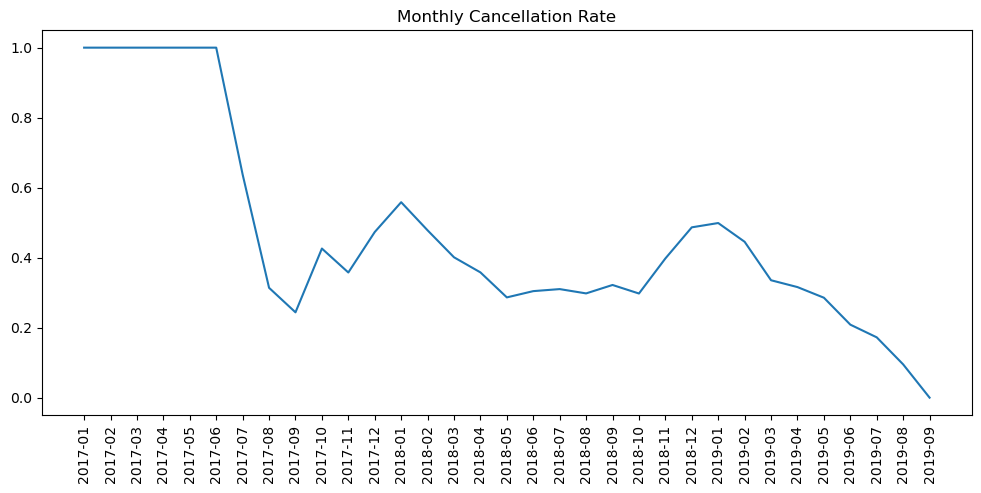

In [33]:
#booking & cancelation trend
monthly = (
    df
    .groupby(df['reservation_status_date'].dt.to_period('M'))
    .agg(
        total_booking=('bookingID', 'count'),
        cancel_rate=('is_canceled', 'mean')
    )
    .reset_index()
)

monthly['reservation_status_date'] = monthly['reservation_status_date'].astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly['reservation_status_date'], monthly['cancel_rate'])
plt.xticks(rotation=90)
plt.title('Monthly Cancellation Rate')
plt.show()

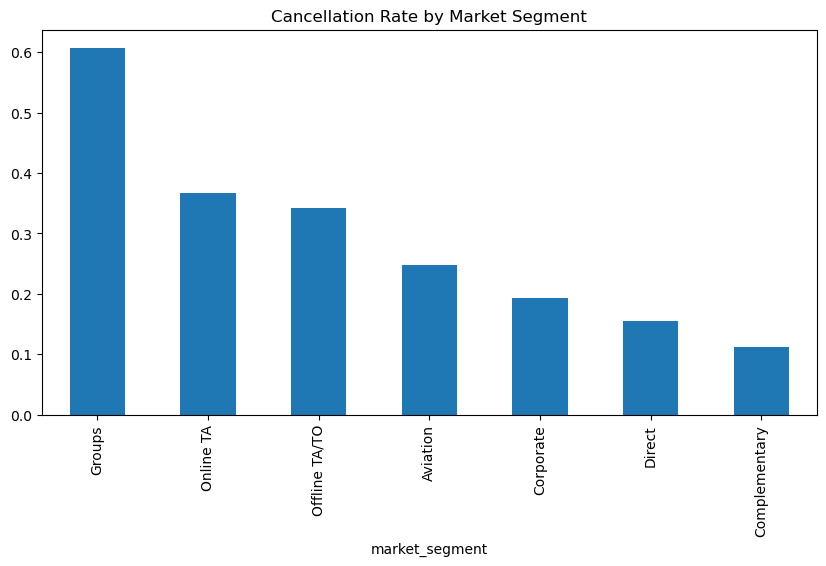

In [34]:
#market segment vs cancelation
segment_cancel = (
    df.groupby('market_segment')['is_canceled']
    .mean()
    .sort_values(ascending=False)
)

segment_cancel.plot(kind='bar', figsize=(10,5))
plt.title('Cancellation Rate by Market Segment')
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel_name                      82944 non-null  object        
 1   country                         82944 non-null  object        
 2   bookingID                       82944 non-null  int64         
 3   is_canceled                     82944 non-null  int64         
 4   reservation_status              82944 non-null  object        
 5   reservation_status_date         82944 non-null  datetime64[ns]
 6   arrival_date_year               82944 non-null  int64         
 7   arrival_date_month              82944 non-null  object        
 8   arrival_date_week_number        82944 non-null  int64         
 9   arrival_date_day_of_month       82944 non-null  int64         
 10  stays_in_weekend_nights         82944 non-null  int64         
 11  stays_i

In [37]:
df.to_excel("hotel booking.xlsx", index=False)